## Introduction 
The Credit Risk Customer dataset is a collection of various features used to assess credit risk. The features include a mix of numerical and categorical data, such as checking_status, credit_amount, age, and class, which classifies individuals as either "good" or "bad" credit risks.   This dataset is likely used for credit scoring, where financial and personal factors determine the likelihood of repayment. This dataset can be used to build machine learning models to predict credit risk in customers based on financial and personal factors. This can be useful for researchers and policymakers to study trends in credit risk among different demographic groups. It can also be used by risk assessment firms or credit bureaus to provide insights and consulting services to lenders. This dataset can also be used to build automated loan approval systems that help financial organizations decide whether to grant loans to applicants.

### Features

Checking account: A checking account is a type of bank account designed for everyday financial transactions. This shows the status of the applicant’s checking account balance. For example: <0: The balance is negative or the applicant has no checking account. 0<=X<200: The balance is between 0 and 200. No checking: The applicant doesn't have a checking account.

Duration: The duration of the credit or loan in months. 

Credit history: Describes the applicant's past credit experience: Critical/other existing credit: Applicant has a poor credit history or outstanding credit. Existing paid: The applicant has successfully repaid existing loans. Delayed previously: Previous credit payments were delayed.

Purpose: Indicates the reason for taking the loan, such as radio, TV, etc.

Credit Amount: The total amount of credit requested. 

Savings status: Represents the applicant’s savings account status: No known savings: The applicant doesn't have savings. <100: Savings are less than 100 currency units.

Employment: Indicates the number of years the applicant has been employed:>=7: Employed for more than 7 years. 1<=X<4: Employed for 1 to 4 years.
4<=X<7: Employed for 4 to 7 years.

Installment Commitment: The percentage of the applicant's disposable income allocated to loan installments.

Personal Status: Describes the applicant’s marital and gender status.

Other Parties: Refers to whether there are any additional individuals involved in the credit (such as a co-applicant or guarantor): None: No Other parties involved. Guarantor: Another person guarantees to pay back the credit if the applicant fails to do so. 

Property magnitude: Describes the type of property or assets the applicant owns: Real Estate: Applicant owns real estate. Life Insurance: The applicant holds life insurance as an asset. No known property: The applicant has no significant property. 

Age: The age of the applicant, represented in years.

Other payment plans: Indicates whether the applicant has other ongoing payment plans.

Housing: Describes the applicant’s housing situation: Own: The applicant owns their house. For free: The applicant lives rent-free, potentially with family or in a provided accommodation. 

Existing Credits: The number of existing credit lines the applicant has:2.0, 1.0: Indicates whether the applicant has one or two active credits.

Job: The type of job or occupation the applicant holds: Skilled: The applicant holds a skilled job. Unskilled resident: The applicant holds an unskilled job or labor position. 

Num dependents: The number of people financially dependent on the applicant, such as children or elderly parents.

Own telephone: Whether the applicant owns a telephone.

Foreign_worker: Whether the applicant is a foreign worker.

Class: This is the target variable that categorizes whether the applicant is considered a good or bad credit risk:

Good credit and Bad credit refer to the assessment of an individual’s creditworthiness, which indicates their ability and reliability to repay borrowed money.

Good Credit: A person with good credit is considered reliable in repaying their debts, based on their credit history and financial behavior.

Bad Credit: A person with bad credit is considered risky by lenders because of a history of missed payments, defaults, or excessive debt.

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Loading the dataset
df=pd.read_csv("credit_customers.csv")

In [4]:
# Checking the first few rows of the dataset
df.head()

checking_status  duration                  credit_history  \
0              <0       6.0  critical/other existing credit   
1        0<=X<200      48.0                   existing paid   
2     no checking      12.0  critical/other existing credit   
3              <0      42.0                   existing paid   
4              <0      24.0              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv         1169.0  no known savings        >=7   
1             radio/tv         5951.0              <100     1<=X<4   
2            education         2096.0              <100     4<=X<7   
3  furniture/equipment         7882.0              <100     4<=X<7   
4              new car         4870.0              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                     4.0         male single          none  ...   
1                     2.0  female div/dep/mar          none  ...   
2                     2.0         male single          none  ...   
3                     2.0         male single     guarantor  ...   
4                     3.0         male single          none  ...   

   property_magnitude   age  other_payment_plans   housing existing_credits  \
0         real estate  67.0                 none       own              2.0   
1         real estate  22.0                 none       own              1.0   
2         real estate  49.0                 none       own              1.0   
3      life insurance  45.0                 none  for free              1.0   
4   no known property  53.0                 none  for free              2.0   

                  job num_dependents  own_telephone foreign_worker class  
0             skilled            1.0            yes            yes  good  
1             skilled            1.0           none            yes   bad  
2  unskilled resident            2.0           none            yes  good  
3             skilled            2.0           none            yes  good  
4             skilled            2.0           none            yes   bad  

[5 rows x 21 columns]

In [5]:
# Checking the last few rows of the dataset
df.tail()

checking_status  duration                  credit_history  \
995     no checking      12.0                   existing paid   
996              <0      30.0                   existing paid   
997     no checking      12.0                   existing paid   
998              <0      45.0                   existing paid   
999        0<=X<200      45.0  critical/other existing credit   

                 purpose  credit_amount savings_status  employment  \
995  furniture/equipment         1736.0           <100      4<=X<7   
996             used car         3857.0           <100      1<=X<4   
997             radio/tv          804.0           <100         >=7   
998             radio/tv         1845.0           <100      1<=X<4   
999             used car         4576.0     100<=X<500  unemployed   

     installment_commitment     personal_status other_parties  ...  \
995                     3.0  female div/dep/mar          none  ...   
996                     4.0        male div/sep          none  ...   
997                     4.0         male single          none  ...   
998                     4.0         male single          none  ...   
999                     3.0         male single          none  ...   

     property_magnitude   age  other_payment_plans   housing existing_credits  \
995         real estate  31.0                 none       own              1.0   
996      life insurance  40.0                 none       own              1.0   
997                 car  38.0                 none       own              1.0   
998   no known property  23.0                 none  for free              1.0   
999                 car  27.0                 none       own              1.0   

                           job num_dependents  own_telephone foreign_worker  \
995         unskilled resident            1.0           none            yes   
996  high qualif/self emp/mgmt            1.0            yes            yes   
997                    skilled            1.0           none            yes   
998                    skilled            1.0            yes            yes   
999                    skilled            1.0           none            yes   

    class  
995  good  
996  good  
997  good  
998   bad  
999  good  

[5 rows x 21 columns]

#### Data Inspection

In [6]:
# Checking the rows and columns of the dataset
df.shape

(1000, 21)

In [7]:
##Checking the data type in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [8]:
# Checking the statistical information in the dataset.
df.describe()

duration  credit_amount  installment_commitment  residence_since  \
count  1000.000000    1000.000000             1000.000000      1000.000000   
mean     20.903000    3271.258000                2.973000         2.845000   
std      12.058814    2822.736876                1.118715         1.103718   
min       4.000000     250.000000                1.000000         1.000000   
25%      12.000000    1365.500000                2.000000         2.000000   
50%      18.000000    2319.500000                3.000000         3.000000   
75%      24.000000    3972.250000                4.000000         4.000000   
max      72.000000   18424.000000                4.000000         4.000000   

               age  existing_credits  num_dependents  
count  1000.000000       1000.000000     1000.000000  
mean     35.546000          1.407000        1.155000  
std      11.375469          0.577654        0.362086  
min      19.000000          1.000000        1.000000  
25%      27.000000          1.000000        1.000000  
50%      33.000000          1.000000        1.000000  
75%      42.000000          2.000000        1.000000  
max      75.000000          4.000000        2.000000

In [9]:
# Checking the columns of the dataset
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [10]:
# Checking the null values in the dataset.
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

<Axes: >

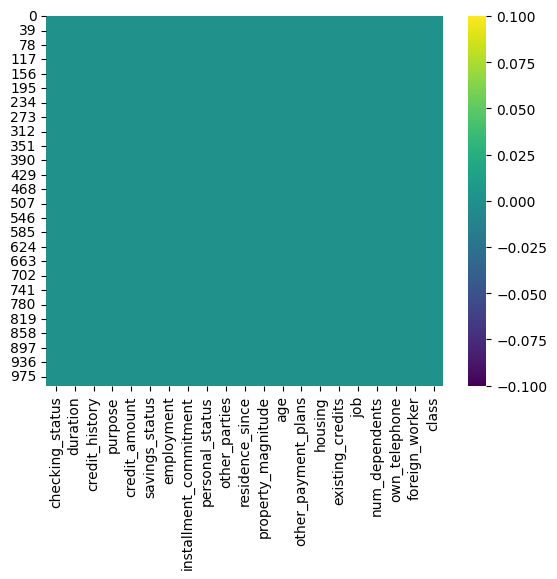

In [11]:
#Visualizing the null values through heatmap
sns.heatmap(df.isnull(),cmap='viridis')

In [12]:
#List of numerical variables
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
# O means object ie., string value
print("Number of numerical variables", len(numerical_features))

Number of numerical variables 7


In [13]:
#List of categorical variables
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
# O means object ie., string value
print("Number of categorical variables", len(categorical_features))

Number of categorical variables 14


In [14]:
categorical_features

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker',
 'class']

In [16]:
numerical_features

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents']

In [17]:
# Printing the unique values of each categorical features
for feature in categorical_features:
    print(feature, df[feature].unique())

checking_status ['<0' '0<=X<200' 'no checking' '>=200']
credit_history ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
purpose ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
savings_status ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
employment ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']
personal_status ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']
other_parties ['none' 'guarantor' 'co applicant']
property_magnitude ['real estate' 'life insurance' 'no known property' 'car']
other_payment_plans ['none' 'bank' 'stores']
housing ['own' 'for free' 'rent']
job ['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']
own_telephone ['yes' 'none']
foreign_worker ['yes' 'no']
class ['good' 'bad']


In [18]:
# Printing the unique values of each numerical features 
for feature in numerical_features:
    print(feature, df[feature].unique().tolist())

duration [6.0, 48.0, 12.0, 42.0, 24.0, 36.0, 30.0, 15.0, 9.0, 10.0, 7.0, 60.0, 18.0, 45.0, 11.0, 27.0, 8.0, 54.0, 20.0, 14.0, 33.0, 21.0, 16.0, 4.0, 47.0, 13.0, 22.0, 39.0, 28.0, 5.0, 26.0, 72.0, 40.0]
credit_amount [1169.0, 5951.0, 2096.0, 7882.0, 4870.0, 9055.0, 2835.0, 6948.0, 3059.0, 5234.0, 1295.0, 4308.0, 1567.0, 1199.0, 1403.0, 1282.0, 2424.0, 8072.0, 12579.0, 3430.0, 2134.0, 2647.0, 2241.0, 1804.0, 2069.0, 1374.0, 426.0, 409.0, 2415.0, 6836.0, 1913.0, 4020.0, 5866.0, 1264.0, 1474.0, 4746.0, 6110.0, 2100.0, 1225.0, 458.0, 2333.0, 1158.0, 6204.0, 6187.0, 6143.0, 1393.0, 2299.0, 1352.0, 7228.0, 2073.0, 5965.0, 1262.0, 3378.0, 2225.0, 783.0, 6468.0, 9566.0, 1961.0, 6229.0, 1391.0, 1537.0, 1953.0, 14421.0, 3181.0, 5190.0, 2171.0, 1007.0, 1819.0, 2394.0, 8133.0, 730.0, 1164.0, 5954.0, 1977.0, 1526.0, 3965.0, 4771.0, 9436.0, 3832.0, 5943.0, 1213.0, 1568.0, 1755.0, 2315.0, 1412.0, 12612.0, 2249.0, 1108.0, 618.0, 1409.0, 797.0, 3617.0, 1318.0, 15945.0, 2012.0, 2622.0, 2337.0, 7057.0, 14

In [19]:
def bar_plot(variable):
    "input - variable,example - Gender"
    "Output - Bar Plot "
    
    var=df[variable]
    varValue=var.value_counts()
    
    #visualize
    plt.figure(figsize=(5,2))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

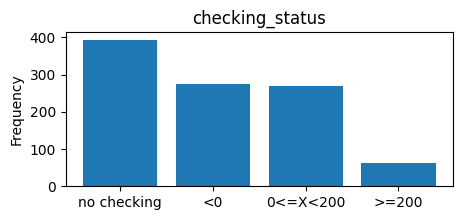

checking_status: 
 checking_status
no checking    394
<0             274
0<=X<200       269
>=200           63
Name: count, dtype: int64


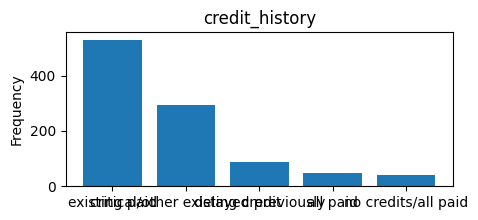

credit_history: 
 credit_history
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: count, dtype: int64


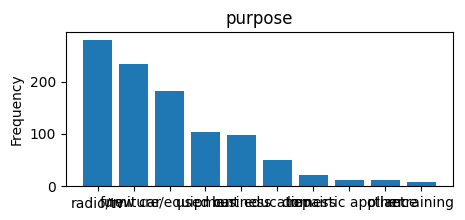

purpose: 
 purpose
radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: count, dtype: int64


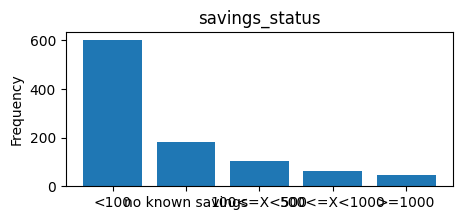

savings_status: 
 savings_status
<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: count, dtype: int64


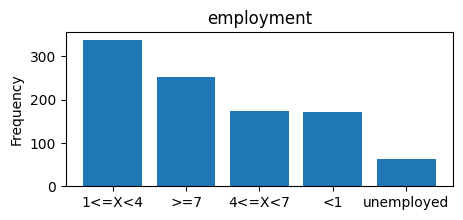

employment: 
 employment
1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: count, dtype: int64


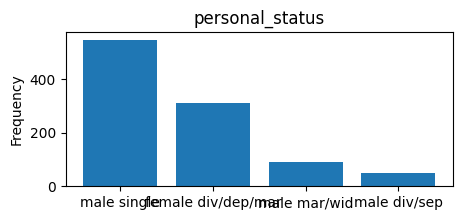

personal_status: 
 personal_status
male single           548
female div/dep/mar    310
male mar/wid           92
male div/sep           50
Name: count, dtype: int64


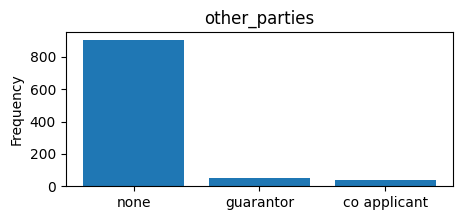

other_parties: 
 other_parties
none            907
guarantor        52
co applicant     41
Name: count, dtype: int64


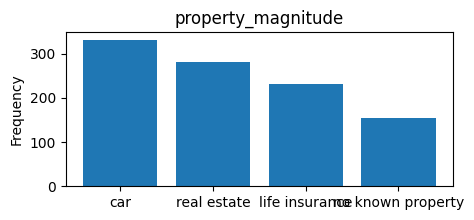

property_magnitude: 
 property_magnitude
car                  332
real estate          282
life insurance       232
no known property    154
Name: count, dtype: int64


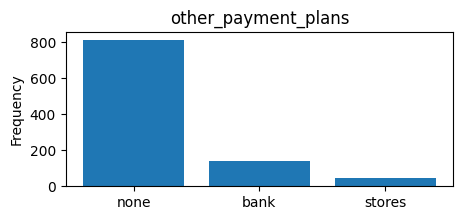

other_payment_plans: 
 other_payment_plans
none      814
bank      139
stores     47
Name: count, dtype: int64


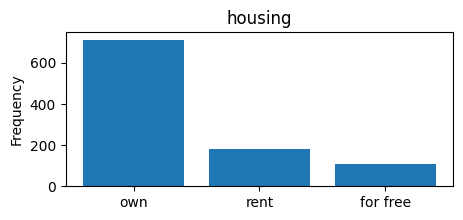

housing: 
 housing
own         713
rent        179
for free    108
Name: count, dtype: int64


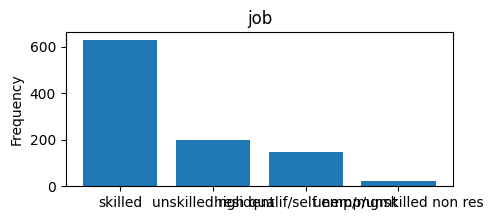

job: 
 job
skilled                      630
unskilled resident           200
high qualif/self emp/mgmt    148
unemp/unskilled non res       22
Name: count, dtype: int64


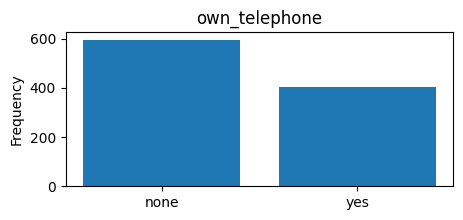

own_telephone: 
 own_telephone
none    596
yes     404
Name: count, dtype: int64


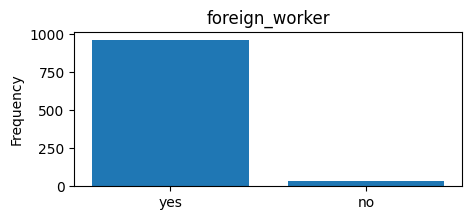

foreign_worker: 
 foreign_worker
yes    963
no      37
Name: count, dtype: int64


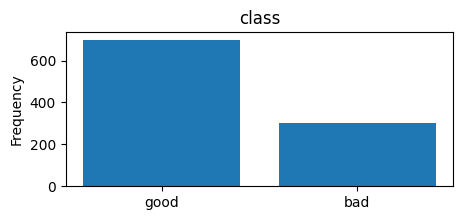

class: 
 class
good    700
bad     300
Name: count, dtype: int64


In [21]:
category1=['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties',
 'property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker','class']
for c in category1:
    bar_plot(c)

In [23]:
def draw_countplots(df,n_rows,n_cols):
    columns=df.columns
    n_plots=len(columns)
    
    fig,axes=plt.subplots(n_rows,n_cols,figsize=(n_cols*5,n_rows*5))
    fig.subplots_adjust(hspace=0.5,wspace=0.5)
    
    for i, col in enumerate(columns):
        row=i//n_cols
        col_idx=i%n_cols
        sns.countplot(data=df,x=df[col],ax=axes[row,col_idx],hue='class')
        axes[row,col_idx].set_title(col)
        
    for remaining in range(i+1,n_rows*n_cols):
        row=remaining//n_cols
        col_idx=remaining%n_cols
        fig.delaxes(axes[row,col_idx])
    fig.suptitle("Histplots of all Category Columns")
    plt.show()

In [24]:
category2=df.drop(['duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents'],axis=1)
category2

checking_status                  credit_history              purpose  \
0                <0  critical/other existing credit             radio/tv   
1          0<=X<200                   existing paid             radio/tv   
2       no checking  critical/other existing credit            education   
3                <0                   existing paid  furniture/equipment   
4                <0              delayed previously              new car   
..              ...                             ...                  ...   
995     no checking                   existing paid  furniture/equipment   
996              <0                   existing paid             used car   
997     no checking                   existing paid             radio/tv   
998              <0                   existing paid             radio/tv   
999        0<=X<200  critical/other existing credit             used car   

       savings_status  employment     personal_status other_parties  \
0    no known savings         >=7         male single          none   
1                <100      1<=X<4  female div/dep/mar          none   
2                <100      4<=X<7         male single          none   
3                <100      4<=X<7         male single     guarantor   
4                <100      1<=X<4         male single          none   
..                ...         ...                 ...           ...   
995              <100      4<=X<7  female div/dep/mar          none   
996              <100      1<=X<4        male div/sep          none   
997              <100         >=7         male single          none   
998              <100      1<=X<4         male single          none   
999        100<=X<500  unemployed         male single          none   

    property_magnitude other_payment_plans   housing  \
0          real estate                none       own   
1          real estate                none       own   
2          real estate                none       own   
3       life insurance                none  for free   
4    no known property                none  for free   
..                 ...                 ...       ...   
995        real estate                none       own   
996     life insurance                none       own   
997                car                none       own   
998  no known property                none  for free   
999                car                none       own   

                           job own_telephone foreign_worker class  
0                      skilled           yes            yes  good  
1                      skilled          none            yes   bad  
2           unskilled resident          none            yes  good  
3                      skilled          none            yes  good  
4                      skilled          none            yes   bad  
..                         ...           ...            ...   ...  
995         unskilled resident          none            yes  good  
996  high qualif/self emp/mgmt           yes            yes  good  
997                    skilled          none            yes  good  
998                    skilled           yes            yes   bad  
999                    skilled          none            yes  good  

[1000 rows x 14 columns]

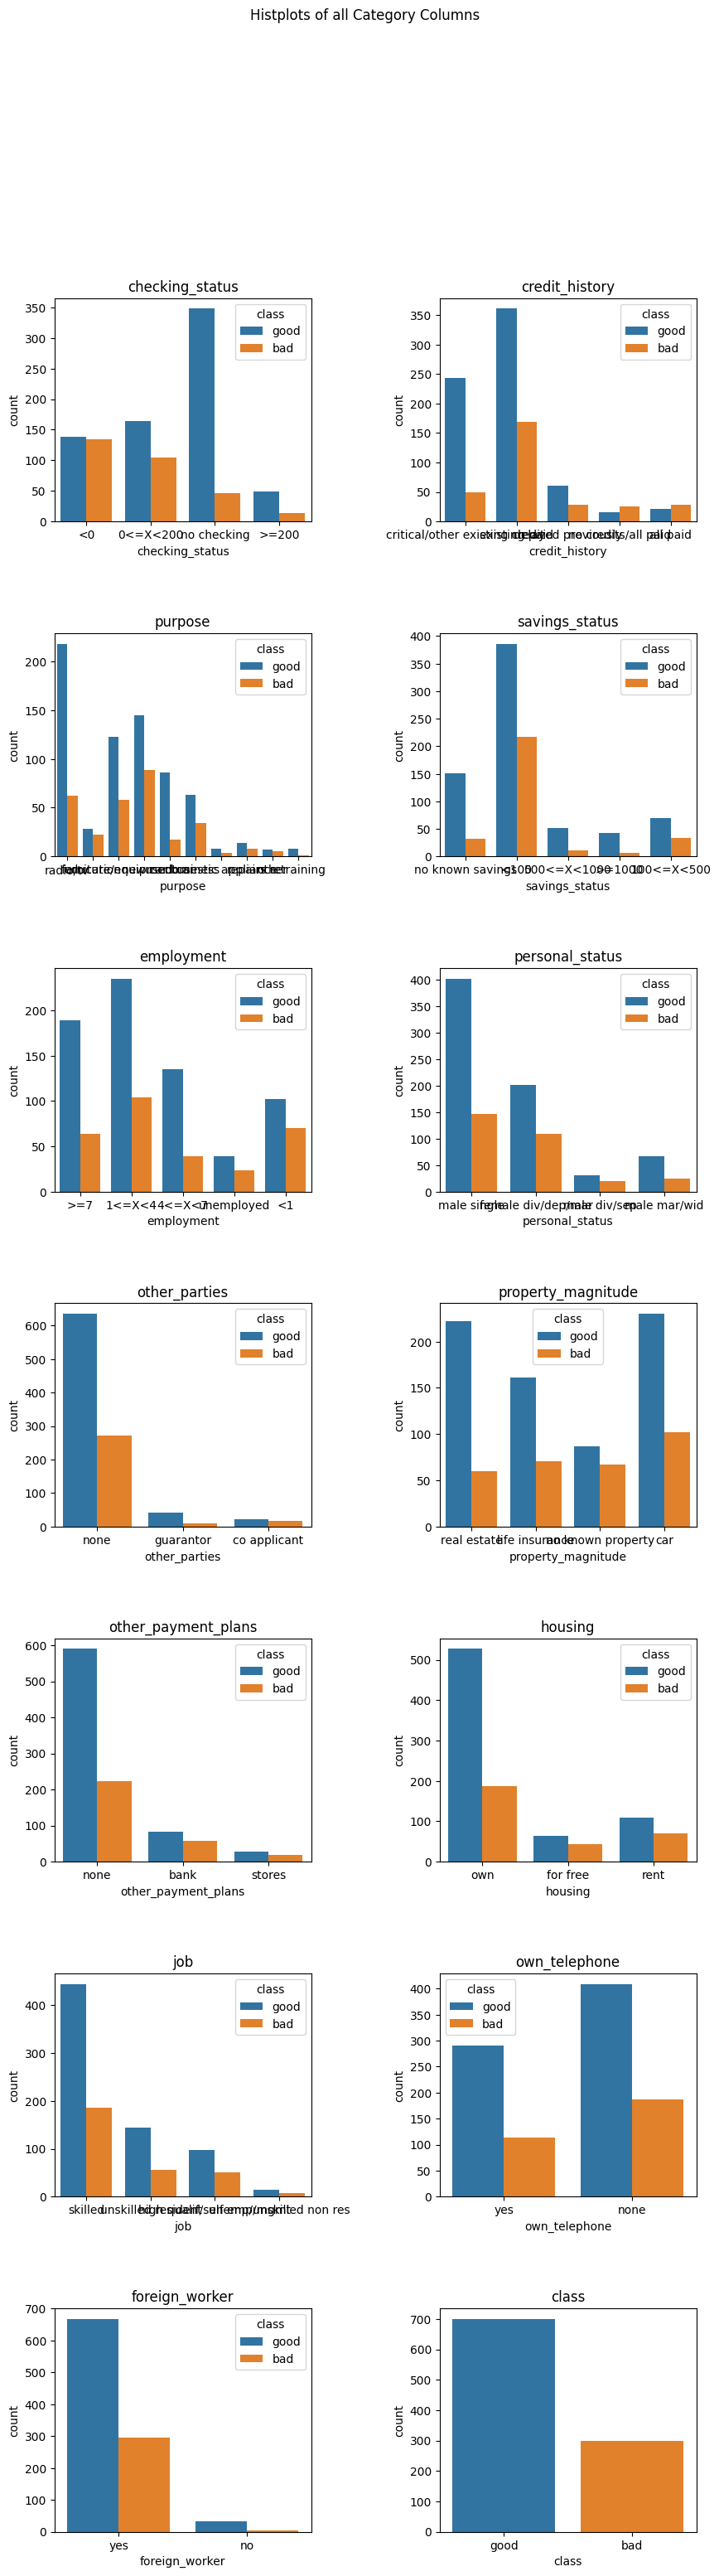

In [25]:
draw_countplots(category2,7,2)

In [26]:
# Numerical Variable distribution
def plot_hist(variable3):
    plt.figure(figsize=(9,3))
    plt.hist(df[variable3],bins=50)
    plt.xlabel(variable3)
    plt.ylabel("Frequency")
    plt.title("{} distribution with histogram plot.".format(variable3))
    plt.show()

In [28]:
numerical_features

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents']

In [29]:
numericVar=['duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents']

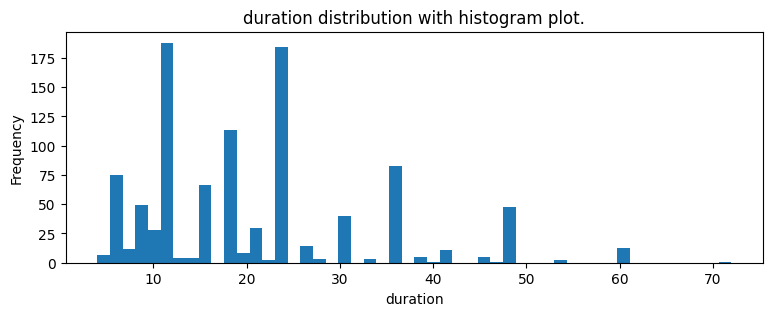

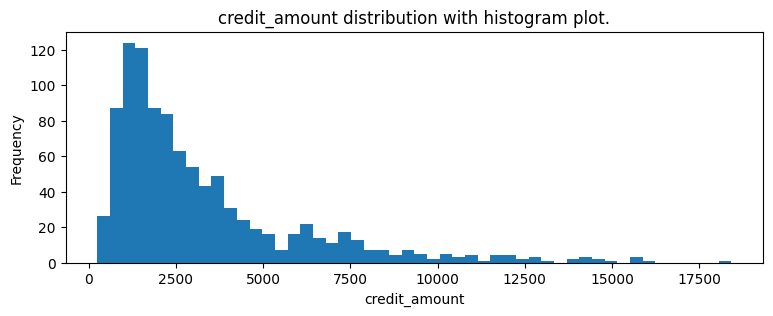

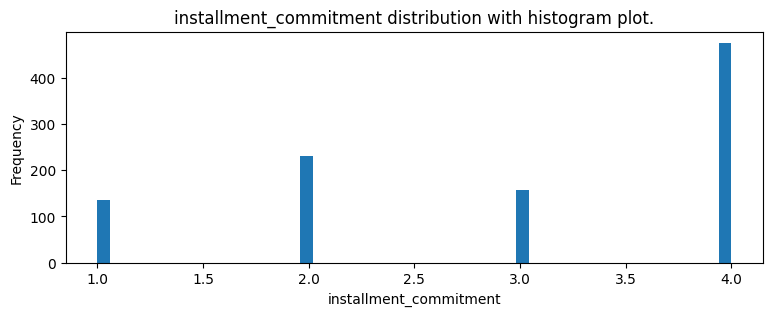

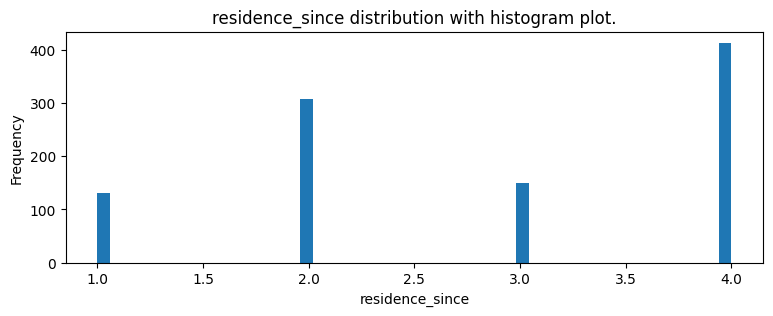

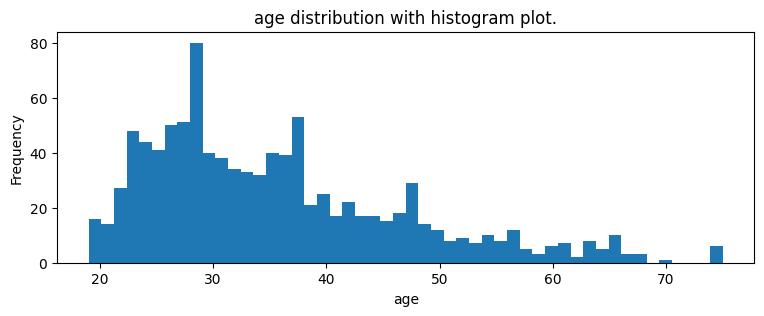

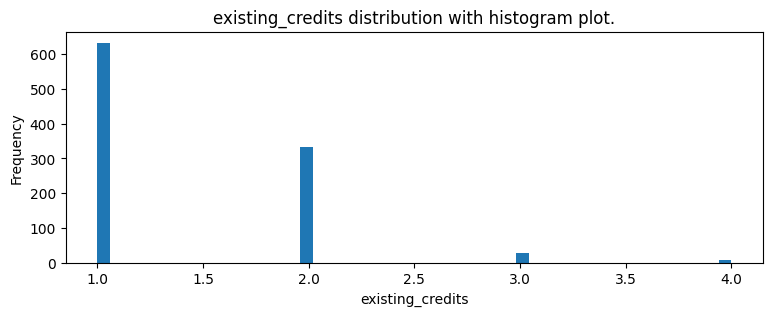

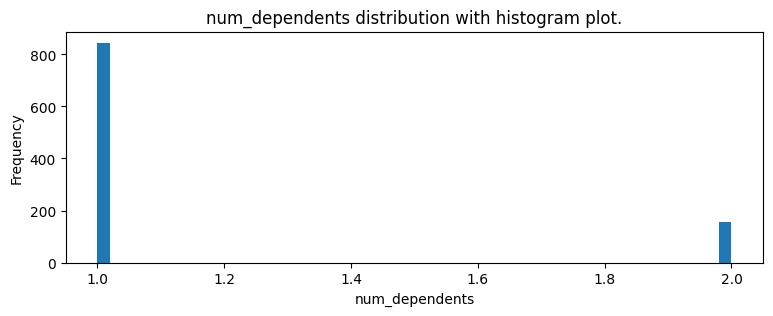

In [30]:
for n in numericVar:
    plot_hist(n)

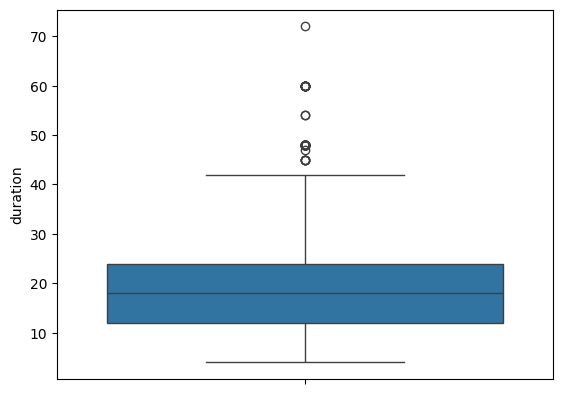

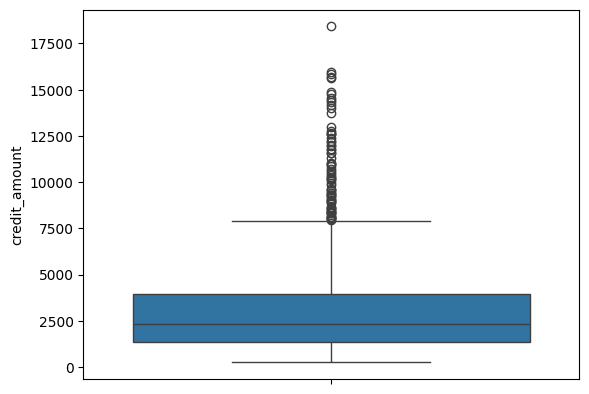

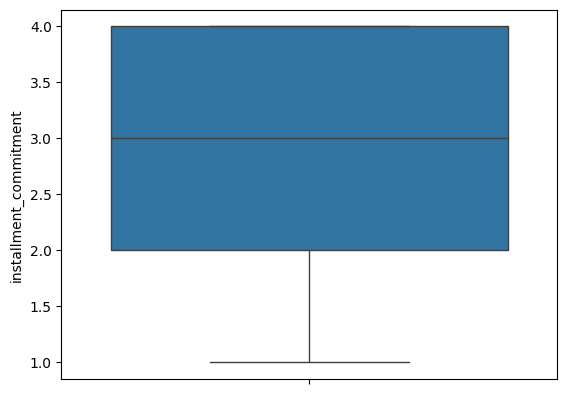

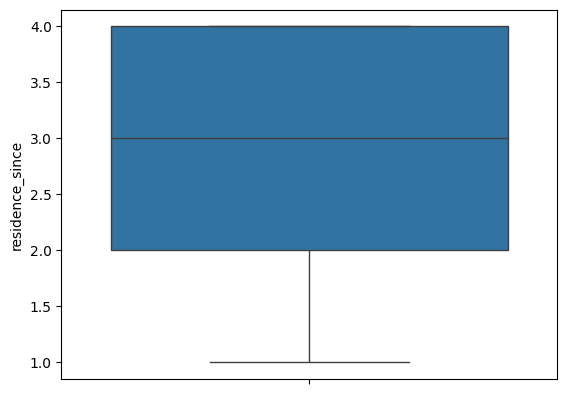

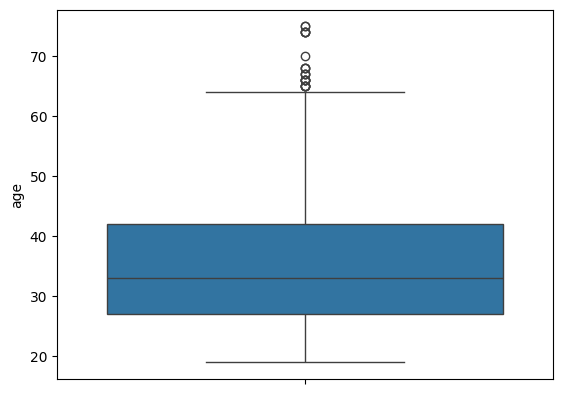

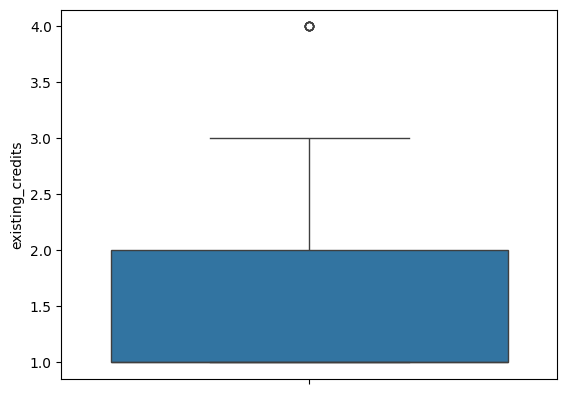

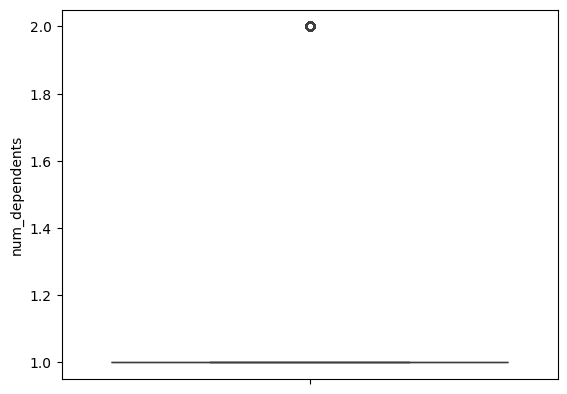

In [26]:
for n2 in numericVar:
    sns.boxplot(y=n2,data=df)
    plt.show()

#### Removing Outliers


In [31]:
q1=df['duration'].quantile(0.25)

In [32]:
q3=df['duration'].quantile(0.75)

In [33]:
iqr=q3-q1
iqr

12.0

In [34]:
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)

In [35]:
upper_bound

42.0

In [36]:
lower_bound

-6.0

In [37]:
outliers=df[(df['duration']<lower_bound)|(df['duration']>upper_bound)]
print(outliers)

    checking_status  duration                  credit_history    purpose  \
1          0<=X<200      48.0                   existing paid   radio/tv   
11               <0      48.0                   existing paid   business   
29               <0      60.0              delayed previously   business   
35         0<=X<200      45.0  critical/other existing credit   radio/tv   
36      no checking      48.0  critical/other existing credit  education   
..              ...       ...                             ...        ...   
945        0<=X<200      48.0             no credits/all paid    new car   
973              <0      60.0                   existing paid   business   
981     no checking      48.0                   existing paid   business   
998              <0      45.0                   existing paid   radio/tv   
999        0<=X<200      45.0  critical/other existing credit   used car   

     credit_amount savings_status  employment  installment_commitment  \
1           59

In [38]:
q1_1=df['credit_amount'].quantile(0.25)

In [39]:
q3_1=df['credit_amount'].quantile(0.75)

In [40]:
iqr1=q3_1-q1_1
upper_bound1=q3_1+(1.5*iqr1)
lower_bound1=q1_1-(1.5*iqr1)
outliers2=df[(df['credit_amount']<lower_bound1)|(df['credit_amount']>upper_bound1)]
print(outliers2)

    checking_status  duration                  credit_history  \
5       no checking      36.0                   existing paid   
17               <0      30.0             no credits/all paid   
18         0<=X<200      24.0                   existing paid   
57      no checking      36.0  critical/other existing credit   
63         0<=X<200      48.0             no credits/all paid   
..              ...       ...                             ...   
927              <0      48.0                   existing paid   
945        0<=X<200      48.0             no credits/all paid   
953     no checking      36.0                   existing paid   
980        0<=X<200      30.0  critical/other existing credit   
983              <0      36.0                   existing paid   

                 purpose  credit_amount    savings_status  employment  \
5              education         9055.0  no known savings      1<=X<4   
17              business         8072.0  no known savings          <1   


In [41]:
q1_2=df['age'].quantile(0.25)
q3_2=df['age'].quantile(0.75)
iqr2=q3_2-q1_2
upper_bound2=q3_2+(1.5*iqr2)
lower_bound2=q1_2-(1.5*iqr2)
outliers3=df[(df['age']<lower_bound2)|(df['age']>upper_bound2)]
print(outliers3)

    checking_status  duration                  credit_history    purpose  \
0                <0       6.0  critical/other existing credit   radio/tv   
75               <0      12.0  critical/other existing credit   used car   
137        0<=X<200      12.0                   existing paid   radio/tv   
163        0<=X<200      10.0                   existing paid    new car   
179              <0      21.0  critical/other existing credit    new car   
186        0<=X<200       9.0                        all paid   used car   
187        0<=X<200      16.0  critical/other existing credit    new car   
213           >=200      30.0              delayed previously   business   
330              <0      24.0  critical/other existing credit   used car   
430     no checking       5.0                   existing paid   business   
438              <0      42.0  critical/other existing credit    repairs   
536              <0       6.0                   existing paid    new car   
554        0

In [42]:
q1_3=df['existing_credits'].quantile(0.25)
q3_3=df['existing_credits'].quantile(0.75)
iqr3=q3_3-q1_3
upper_bound2=q1_3+(1.5*iqr3)
lower_bound2=q3_3-(1.5*iqr3)
outliers4=df[(df['existing_credits']<lower_bound2)|(df['existing_credits']>upper_bound2)]
print(outliers4)

    checking_status  duration                  credit_history  \
17               <0      30.0             no credits/all paid   
20      no checking       9.0  critical/other existing credit   
65      no checking      27.0                   existing paid   
138        0<=X<200      15.0  critical/other existing credit   
187        0<=X<200      16.0  critical/other existing credit   
190     no checking      24.0                   existing paid   
197        0<=X<200      12.0                   existing paid   
205              <0      30.0  critical/other existing credit   
206     no checking      12.0  critical/other existing credit   
234     no checking       4.0  critical/other existing credit   
246     no checking      12.0  critical/other existing credit   
259     no checking      11.0  critical/other existing credit   
262              <0      18.0  critical/other existing credit   
263     no checking      12.0  critical/other existing credit   
409           >=200      

In [43]:
q1_4=df['num_dependents'].quantile(0.25)
q3_4=df['num_dependents'].quantile(0.75)
iqr4=q3_4-q1_4
upper_bound2=q3_4+(1.5*iqr4)
lower_bound2=q1_4-(1.5*iqr4)
outliers5=df[(df['num_dependents']<lower_bound2)|(df['num_dependents']>upper_bound2)]
print(outliers5)

    checking_status  duration                  credit_history  \
2       no checking      12.0  critical/other existing credit   
3                <0      42.0                   existing paid   
4                <0      24.0              delayed previously   
5       no checking      36.0                   existing paid   
19      no checking      24.0                   existing paid   
..              ...       ...                             ...   
971     no checking      24.0                   existing paid   
978     no checking      24.0              delayed previously   
983              <0      36.0                   existing paid   
990     no checking      12.0  critical/other existing credit   
991     no checking      15.0                        all paid   

                 purpose  credit_amount    savings_status employment  \
2              education         2096.0              <100     4<=X<7   
3    furniture/equipment         7882.0              <100     4<=X<7   
4  

In [44]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v >2)
    
    return multiple_outliers

In [45]:
df.loc[detect_outliers(df,["duration","credit_amount","age","existing_credits","num_dependents"])]

checking_status  duration       credit_history   purpose  credit_amount  \
78      no checking      54.0  no credits/all paid  used car         9436.0   
927              <0      48.0        existing paid  used car        10297.0   

       savings_status employment  installment_commitment personal_status  \
78   no known savings     1<=X<4                     2.0     male single   
927              <100     4<=X<7                     4.0     male single   

    other_parties  ...  property_magnitude   age  other_payment_plans  \
78           none  ...      life insurance  39.0                 none   
927          none  ...   no known property  39.0               stores   

      housing existing_credits                 job num_dependents  \
78        own              1.0  unskilled resident            2.0   
927  for free              3.0             skilled            2.0   

     own_telephone foreign_worker class  
78            none            yes  good  
927            yes            yes   bad  

[2 rows x 21 columns]

In [46]:
df=df.drop(detect_outliers(df,["duration","credit_amount","age","existing_credits","num_dependents"]),axis=0).reset_index(drop=True)

In [47]:
df.loc[detect_outliers(df,["duration","credit_amount","age","existing_credits","num_dependents"])]

Empty DataFrame
Columns: [checking_status, duration, credit_history, purpose, credit_amount, savings_status, employment, installment_commitment, personal_status, other_parties, residence_since, property_magnitude, age, other_payment_plans, housing, existing_credits, job, num_dependents, own_telephone, foreign_worker, class]
Index: []

[0 rows x 21 columns]

In [48]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

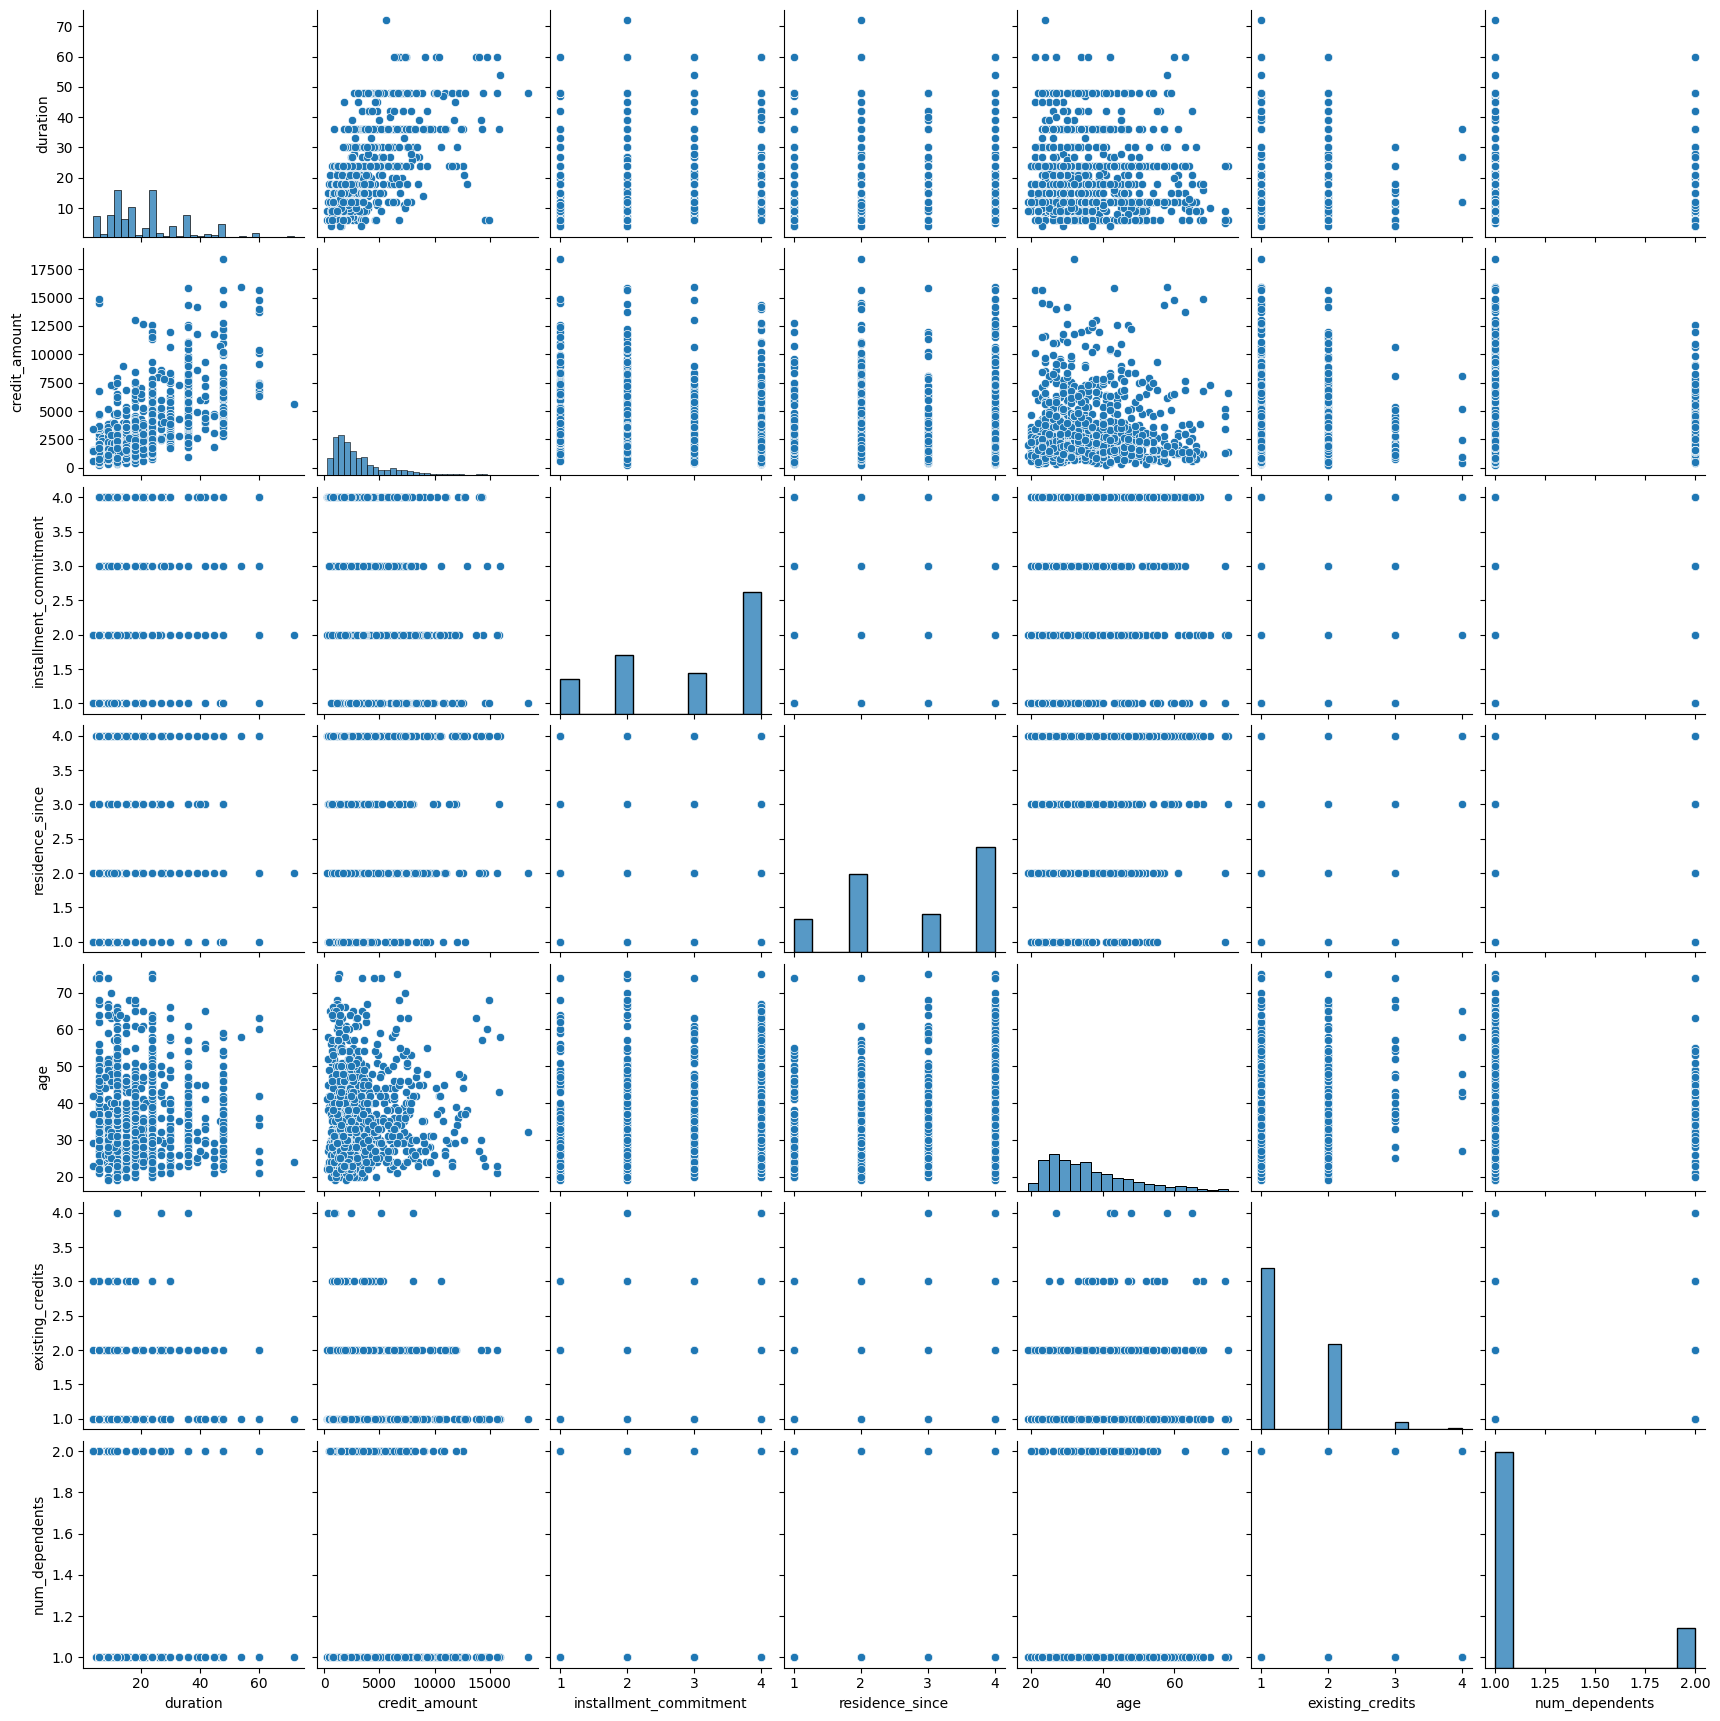

In [49]:
sns.pairplot(df)

In [50]:
numerical_features_convert = df[numerical_features]  # Assuming df is your original DataFrame


<Axes: >

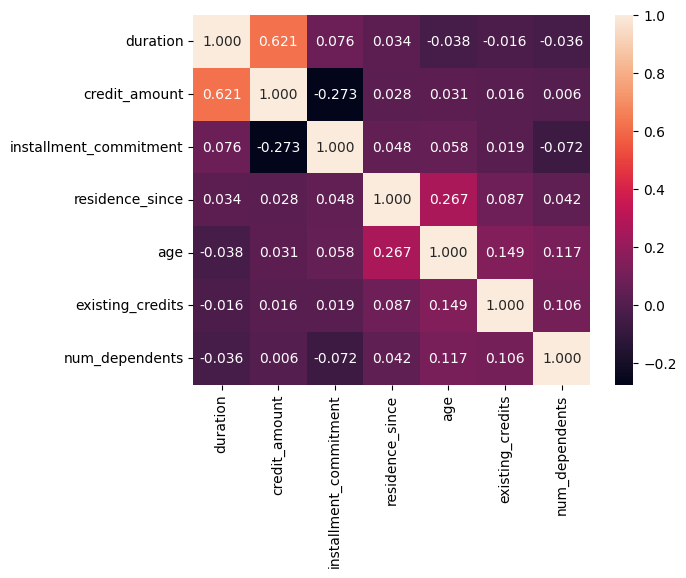

In [51]:
sns.heatmap(numerical_features_convert.corr(), annot=True,fmt=".3f")  # This heatmap is without class feature.

In [52]:
df['class']=df['class'].map({'good': 1, 'bad': 0})

In [53]:
df.head()

checking_status  duration                  credit_history  \
0              <0       6.0  critical/other existing credit   
1        0<=X<200      48.0                   existing paid   
2     no checking      12.0  critical/other existing credit   
3              <0      42.0                   existing paid   
4              <0      24.0              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv         1169.0  no known savings        >=7   
1             radio/tv         5951.0              <100     1<=X<4   
2            education         2096.0              <100     4<=X<7   
3  furniture/equipment         7882.0              <100     4<=X<7   
4              new car         4870.0              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                     4.0         male single          none  ...   
1                     2.0  female div/dep/mar          none  ...   
2                     2.0         male single          none  ...   
3                     2.0         male single     guarantor  ...   
4                     3.0         male single          none  ...   

   property_magnitude   age  other_payment_plans   housing existing_credits  \
0         real estate  67.0                 none       own              2.0   
1         real estate  22.0                 none       own              1.0   
2         real estate  49.0                 none       own              1.0   
3      life insurance  45.0                 none  for free              1.0   
4   no known property  53.0                 none  for free              2.0   

                  job num_dependents  own_telephone foreign_worker class  
0             skilled            1.0            yes            yes     1  
1             skilled            1.0           none            yes     0  
2  unskilled resident            2.0           none            yes     1  
3             skilled            2.0           none            yes     1  
4             skilled            2.0           none            yes     0  

[5 rows x 21 columns]

In [54]:
num_feat_after_conv_class=[feature for feature in df.columns if df[feature].dtypes!='O']

In [55]:
num_feat_after_conv_class

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents',
 'class']

In [56]:
df1=df[num_feat_after_conv_class]

<Axes: >

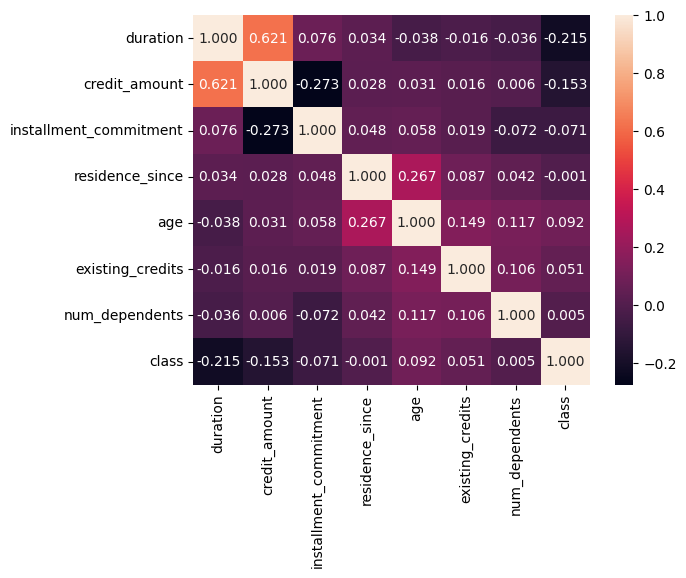

In [57]:
sns.heatmap(df1.corr(), annot=True,fmt=".3f")


We'll see the correlation of 'CLASS' with other features. 

Duration: Negatively correlated. Longer loan durations are negatively correlated with good credit outcomes. This suggests that longer loan durations may be associated with a higher credit risk (bad credit). 

Credit Amount: Negatively correlated. Higher credit amounts are also negatively correlated with the class feature. This means that higher credit amounts might be linked to worse credit ratings (more likely to be bad credit).

Installment Commitment: Negatively correlated. The correlation between installment_commitment and class is weakly negative. A higher installment commitment might have a small negative impact on credit outcomes, but the effect is relatively minimal.

Residence Since: No correlation. The length of residence has almost no correlation with credit class. This suggests that how long a person has lived in a certain place has no real impact on whether they have good or bad credit.

Age: Positively correlated. Age has a slightly positive correlation with class. This means that older individuals might have a slightly higher chance of having good credit. 

Number of Dependents: No correlation. The number of dependents has almost no correlation with credit class, indicating that whether a person has dependents doesn't significantly affect their credit outcome.


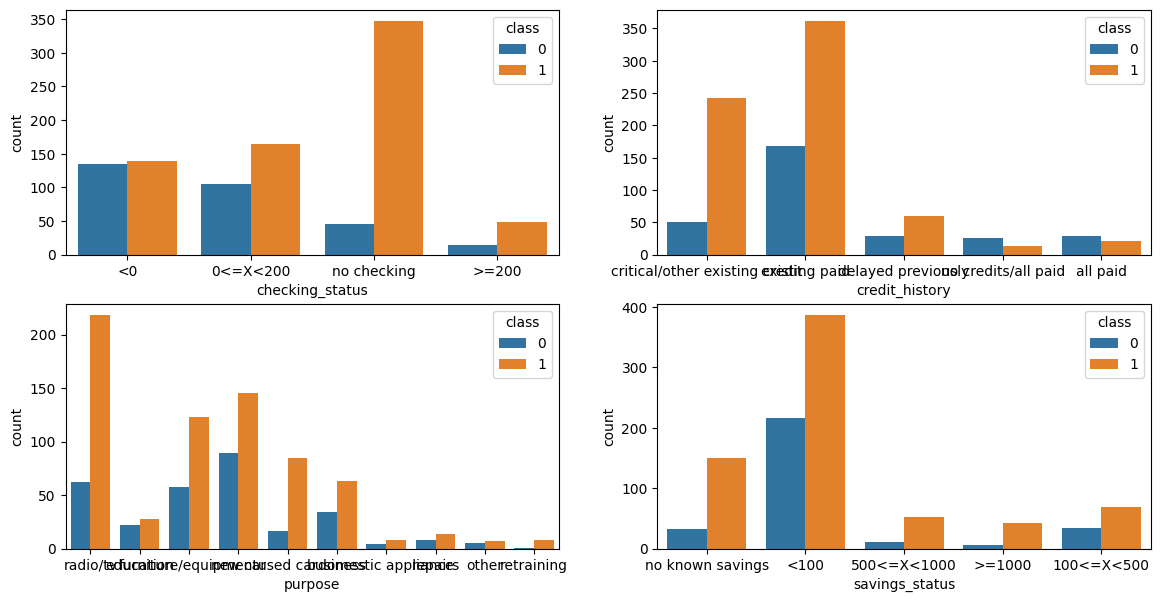

In [58]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14,7))

sns.countplot(ax = axes[0,0], data = df, x = "checking_status", hue = "class")
sns.countplot(ax = axes[0,1], data = df, x = "credit_history", hue = "class")
sns.countplot(ax = axes[1,0], data = df, x = "purpose", hue = "class")
sns.countplot(ax = axes[1,1], data = df, x = "savings_status", hue = "class")

plt.show()

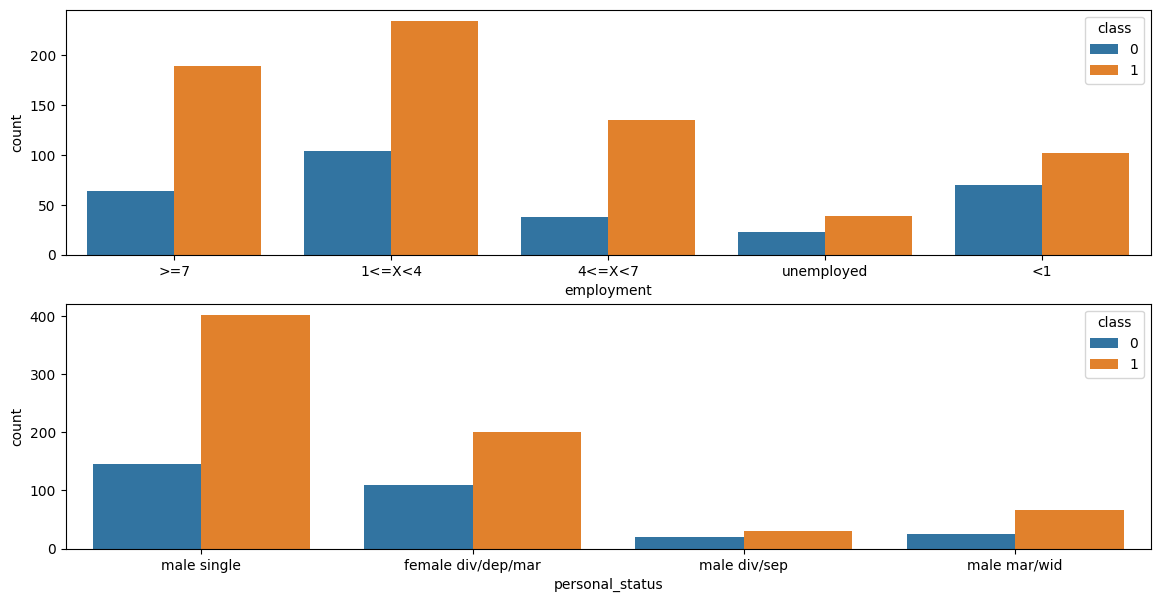

In [59]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (14,7))
sns.countplot(ax = axes[0], data = df, x = "employment", hue = "class")
sns.countplot(ax = axes[1], data = df, x = "personal_status", hue = "class")

plt.show()

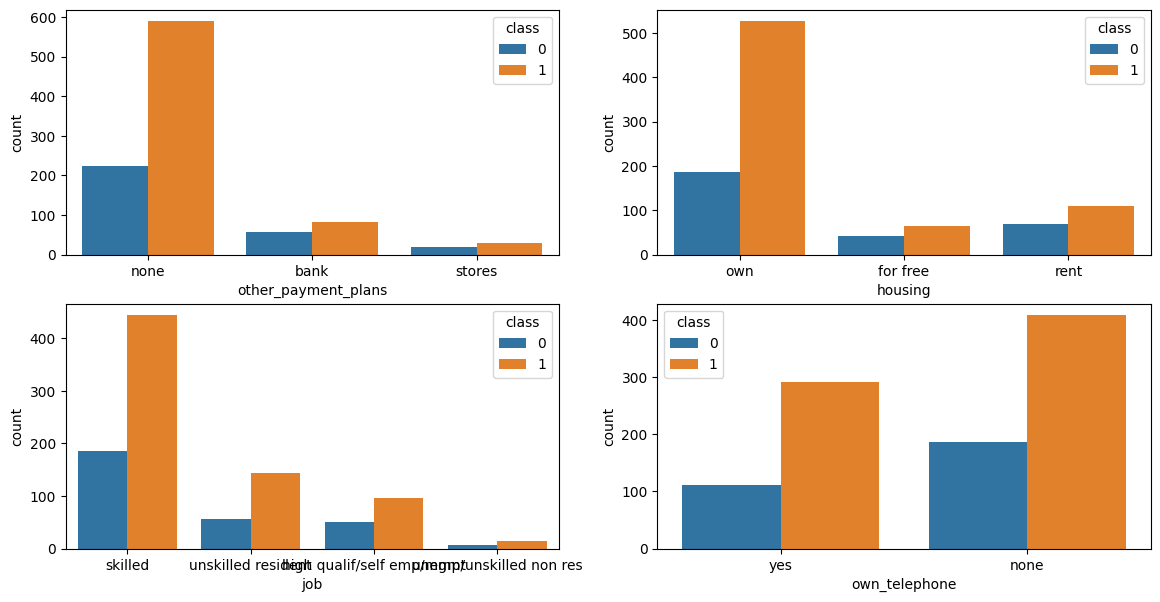

In [60]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14,7))
sns.countplot(ax = axes[0,0], data = df, x = "other_payment_plans", hue = "class")
sns.countplot(ax = axes[0,1], data = df, x = "housing", hue = "class")
sns.countplot(ax = axes[1,0], data = df, x = "job", hue = "class")
sns.countplot(ax = axes[1,1], data = df, x = "own_telephone", hue = "class")
plt.show()

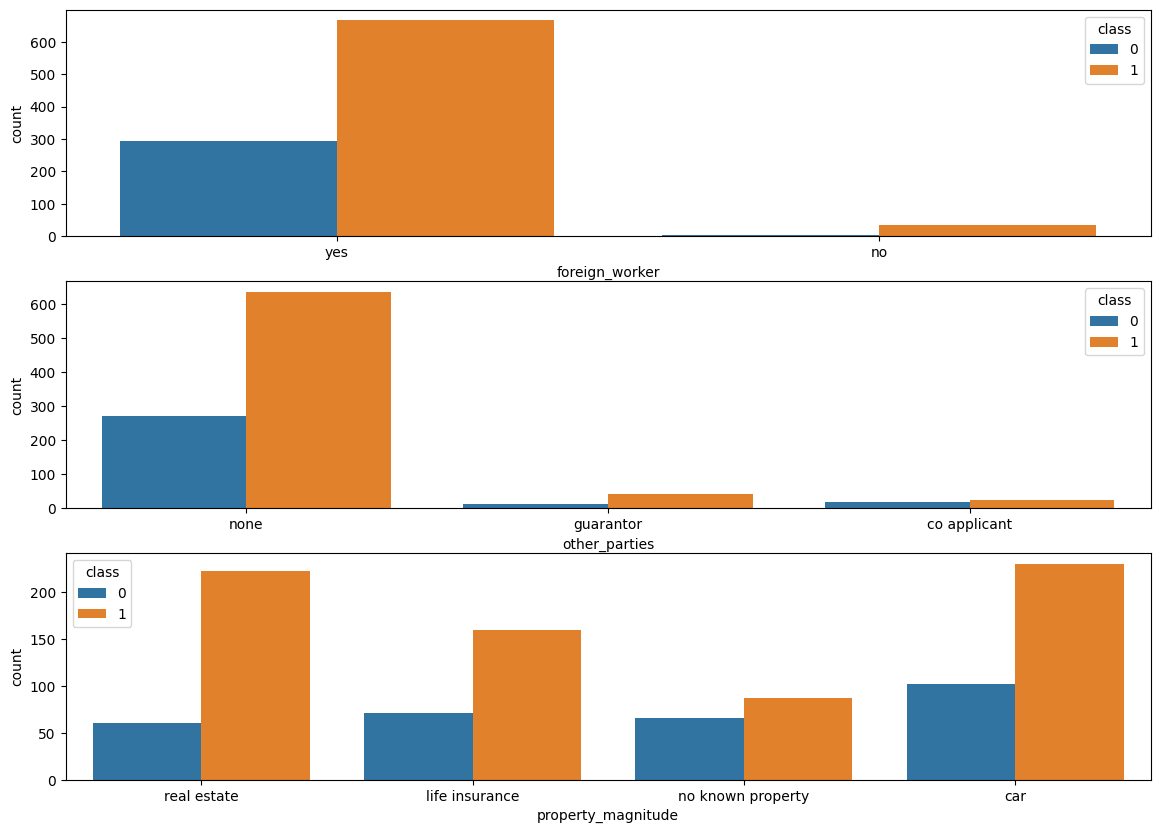

In [61]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (14,10))
sns.countplot(ax = axes[0], data = df, x = "foreign_worker", hue = "class")
sns.countplot(ax = axes[1], data = df, x = "other_parties", hue = "class")
sns.countplot(ax = axes[2], data = df, x = "property_magnitude", hue = "class")
plt.show()


In [62]:
category2

checking_status                  credit_history              purpose  \
0                <0  critical/other existing credit             radio/tv   
1          0<=X<200                   existing paid             radio/tv   
2       no checking  critical/other existing credit            education   
3                <0                   existing paid  furniture/equipment   
4                <0              delayed previously              new car   
..              ...                             ...                  ...   
995     no checking                   existing paid  furniture/equipment   
996              <0                   existing paid             used car   
997     no checking                   existing paid             radio/tv   
998              <0                   existing paid             radio/tv   
999        0<=X<200  critical/other existing credit             used car   

       savings_status  employment     personal_status other_parties  \
0    no known savings         >=7         male single          none   
1                <100      1<=X<4  female div/dep/mar          none   
2                <100      4<=X<7         male single          none   
3                <100      4<=X<7         male single     guarantor   
4                <100      1<=X<4         male single          none   
..                ...         ...                 ...           ...   
995              <100      4<=X<7  female div/dep/mar          none   
996              <100      1<=X<4        male div/sep          none   
997              <100         >=7         male single          none   
998              <100      1<=X<4         male single          none   
999        100<=X<500  unemployed         male single          none   

    property_magnitude other_payment_plans   housing  \
0          real estate                none       own   
1          real estate                none       own   
2          real estate                none       own   
3       life insurance                none  for free   
4    no known property                none  for free   
..                 ...                 ...       ...   
995        real estate                none       own   
996     life insurance                none       own   
997                car                none       own   
998  no known property                none  for free   
999                car                none       own   

                           job own_telephone foreign_worker class  
0                      skilled           yes            yes  good  
1                      skilled          none            yes   bad  
2           unskilled resident          none            yes  good  
3                      skilled          none            yes  good  
4                      skilled          none            yes   bad  
..                         ...           ...            ...   ...  
995         unskilled resident          none            yes  good  
996  high qualif/self emp/mgmt           yes            yes  good  
997                    skilled          none            yes  good  
998                    skilled           yes            yes   bad  
999                    skilled          none            yes  good  

[1000 rows x 14 columns]

## Feature Engineering

#### We have to convert categorical features into numerical features.
Why? Machine learning can be done with numbers, only numbers. So basically if you can turn a data into numbers, you can apply Machine Learning on it. Otherwise, you can't. This is why.
How? There are several ways of doing this. Get dummies, label encoder, or list comprehension. I am going to Getdummies in this notebook.

In [63]:
df.head()

checking_status  duration                  credit_history  \
0              <0       6.0  critical/other existing credit   
1        0<=X<200      48.0                   existing paid   
2     no checking      12.0  critical/other existing credit   
3              <0      42.0                   existing paid   
4              <0      24.0              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv         1169.0  no known savings        >=7   
1             radio/tv         5951.0              <100     1<=X<4   
2            education         2096.0              <100     4<=X<7   
3  furniture/equipment         7882.0              <100     4<=X<7   
4              new car         4870.0              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                     4.0         male single          none  ...   
1                     2.0  female div/dep/mar          none  ...   
2                     2.0         male single          none  ...   
3                     2.0         male single     guarantor  ...   
4                     3.0         male single          none  ...   

   property_magnitude   age  other_payment_plans   housing existing_credits  \
0         real estate  67.0                 none       own              2.0   
1         real estate  22.0                 none       own              1.0   
2         real estate  49.0                 none       own              1.0   
3      life insurance  45.0                 none  for free              1.0   
4   no known property  53.0                 none  for free              2.0   

                  job num_dependents  own_telephone foreign_worker class  
0             skilled            1.0            yes            yes     1  
1             skilled            1.0           none            yes     0  
2  unskilled resident            2.0           none            yes     1  
3             skilled            2.0           none            yes     1  
4             skilled            2.0           none            yes     0  

[5 rows x 21 columns]

In [64]:
category2

checking_status                  credit_history              purpose  \
0                <0  critical/other existing credit             radio/tv   
1          0<=X<200                   existing paid             radio/tv   
2       no checking  critical/other existing credit            education   
3                <0                   existing paid  furniture/equipment   
4                <0              delayed previously              new car   
..              ...                             ...                  ...   
995     no checking                   existing paid  furniture/equipment   
996              <0                   existing paid             used car   
997     no checking                   existing paid             radio/tv   
998              <0                   existing paid             radio/tv   
999        0<=X<200  critical/other existing credit             used car   

       savings_status  employment     personal_status other_parties  \
0    no known savings         >=7         male single          none   
1                <100      1<=X<4  female div/dep/mar          none   
2                <100      4<=X<7         male single          none   
3                <100      4<=X<7         male single     guarantor   
4                <100      1<=X<4         male single          none   
..                ...         ...                 ...           ...   
995              <100      4<=X<7  female div/dep/mar          none   
996              <100      1<=X<4        male div/sep          none   
997              <100         >=7         male single          none   
998              <100      1<=X<4         male single          none   
999        100<=X<500  unemployed         male single          none   

    property_magnitude other_payment_plans   housing  \
0          real estate                none       own   
1          real estate                none       own   
2          real estate                none       own   
3       life insurance                none  for free   
4    no known property                none  for free   
..                 ...                 ...       ...   
995        real estate                none       own   
996     life insurance                none       own   
997                car                none       own   
998  no known property                none  for free   
999                car                none       own   

                           job own_telephone foreign_worker class  
0                      skilled           yes            yes  good  
1                      skilled          none            yes   bad  
2           unskilled resident          none            yes  good  
3                      skilled          none            yes  good  
4                      skilled          none            yes   bad  
..                         ...           ...            ...   ...  
995         unskilled resident          none            yes  good  
996  high qualif/self emp/mgmt           yes            yes  good  
997                    skilled          none            yes  good  
998                    skilled           yes            yes   bad  
999                    skilled          none            yes  good  

[1000 rows x 14 columns]

In [65]:
category3=category2.drop("class",axis=1)

In [66]:
category3

checking_status                  credit_history              purpose  \
0                <0  critical/other existing credit             radio/tv   
1          0<=X<200                   existing paid             radio/tv   
2       no checking  critical/other existing credit            education   
3                <0                   existing paid  furniture/equipment   
4                <0              delayed previously              new car   
..              ...                             ...                  ...   
995     no checking                   existing paid  furniture/equipment   
996              <0                   existing paid             used car   
997     no checking                   existing paid             radio/tv   
998              <0                   existing paid             radio/tv   
999        0<=X<200  critical/other existing credit             used car   

       savings_status  employment     personal_status other_parties  \
0    no known savings         >=7         male single          none   
1                <100      1<=X<4  female div/dep/mar          none   
2                <100      4<=X<7         male single          none   
3                <100      4<=X<7         male single     guarantor   
4                <100      1<=X<4         male single          none   
..                ...         ...                 ...           ...   
995              <100      4<=X<7  female div/dep/mar          none   
996              <100      1<=X<4        male div/sep          none   
997              <100         >=7         male single          none   
998              <100      1<=X<4         male single          none   
999        100<=X<500  unemployed         male single          none   

    property_magnitude other_payment_plans   housing  \
0          real estate                none       own   
1          real estate                none       own   
2          real estate                none       own   
3       life insurance                none  for free   
4    no known property                none  for free   
..                 ...                 ...       ...   
995        real estate                none       own   
996     life insurance                none       own   
997                car                none       own   
998  no known property                none  for free   
999                car                none       own   

                           job own_telephone foreign_worker  
0                      skilled           yes            yes  
1                      skilled          none            yes  
2           unskilled resident          none            yes  
3                      skilled          none            yes  
4                      skilled          none            yes  
..                         ...           ...            ...  
995         unskilled resident          none            yes  
996  high qualif/self emp/mgmt           yes            yes  
997                    skilled          none            yes  
998                    skilled           yes            yes  
999                    skilled          none            yes  

[1000 rows x 13 columns]

In [67]:
df3=df.copy()

In [68]:
status = pd.get_dummies(df[['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker']], drop_first = True)
status = status.astype(int)

In [74]:
status

checking_status_<0  checking_status_>=200  checking_status_no checking  \
0                     1                      0                            0   
1                     0                      0                            0   
2                     0                      0                            1   
3                     1                      0                            0   
4                     1                      0                            0   
..                  ...                    ...                          ...   
993                   0                      0                            1   
994                   1                      0                            0   
995                   0                      0                            1   
996                   1                      0                            0   
997                   0                      0                            0   

     credit_history_critical/other existing credit  \
0                                                1   
1                                                0   
2                                                1   
3                                                0   
4                                                0   
..                                             ...   
993                                              0   
994                                              0   
995                                              0   
996                                              0   
997                                              1   

     credit_history_delayed previously  credit_history_existing paid  \
0                                    0                             0   
1                                    0                             1   
2                                    0                             0   
3                                    0                             1   
4                                    1                             0   
..                                 ...                           ...   
993                                  0                             1   
994                                  0                             1   
995                                  0                             1   
996                                  0                             1   
997                                  0                             0   

     credit_history_no credits/all paid  purpose_domestic appliance  \
0                                     0                           0   
1                                     0                           0   
2                                     0                           0   
3                                     0                           0   
4                                     0                           0   
..                                  ...                         ...   
993                                   0                           0   
994                                   0                           0   
995                                   0                           0   
996                                   0                           0   
997                                   0                           0   

     purpose_education  purpose_furniture/equipment  purpose_new car  \
0                    0                            0                0   
1                    0                            0                0   
2                    1                            0                0   
3                    0                            1                0   
4                    0                            0                1   
..                 ...                          ...              ...   
993                  0                            1                0   
994                  0                            0                0   
995                  0                   

In [69]:
df3 = pd.concat([df3, status], axis = 1)

In [70]:

pd.set_option('display.max_columns', None)
df3.head()

checking_status  duration                  credit_history  \
0              <0       6.0  critical/other existing credit   
1        0<=X<200      48.0                   existing paid   
2     no checking      12.0  critical/other existing credit   
3              <0      42.0                   existing paid   
4              <0      24.0              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv         1169.0  no known savings        >=7   
1             radio/tv         5951.0              <100     1<=X<4   
2            education         2096.0              <100     4<=X<7   
3  furniture/equipment         7882.0              <100     4<=X<7   
4              new car         4870.0              <100     1<=X<4   

   installment_commitment     personal_status other_parties  residence_since  \
0                     4.0         male single          none              4.0   
1                     2.0  female div/dep/mar          none              2.0   
2                     2.0         male single          none              3.0   
3                     2.0         male single     guarantor              4.0   
4                     3.0         male single          none              4.0   

  property_magnitude   age other_payment_plans   housing  existing_credits  \
0        real estate  67.0                none       own               2.0   
1        real estate  22.0                none       own               1.0   
2        real estate  49.0                none       own               1.0   
3     life insurance  45.0                none  for free               1.0   
4  no known property  53.0                none  for free               2.0   

                  job  num_dependents own_telephone foreign_worker  class  \
0             skilled             1.0           yes            yes      1   
1             skilled             1.0          none            yes      0   
2  unskilled resident             2.0          none            yes      1   
3             skilled             2.0          none            yes      1   
4             skilled             2.0          none            yes      0   

   checking_status_<0  checking_status_>=200  checking_status_no checking  \
0                   1                      0                            0   
1                   0                      0                            0   
2                   0                      0                            1   
3                   1                      0                            0   
4                   1                      0                            0   

   credit_history_critical/other existing credit  \
0                                              1   
1                                              0   
2                                              1   
3                                              0   
4                                              0   

   credit_history_delayed previously  credit_history_existing paid  \
0                                  0                             0   
1                                  0                             1   
2                                  0                             0   
3                                  0                             1   
4                                  1                             0   

   credit_history_no credits/all paid  purpose_domestic appliance  \
0                                   0                           0   
1                                   0                           0   
2                                   0                           0   
3                                   0                           0   
4                                   0                           0   

   purpose_education  purpose_furniture/equipment  purpose_new car  \
0                  0                            0                0   
1                  0                 

In [71]:
df3.drop(['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker'],axis=1,inplace=True)

In [72]:
df3.head()

duration  credit_amount  installment_commitment  residence_since   age  \
0       6.0         1169.0                     4.0              4.0  67.0   
1      48.0         5951.0                     2.0              2.0  22.0   
2      12.0         2096.0                     2.0              3.0  49.0   
3      42.0         7882.0                     2.0              4.0  45.0   
4      24.0         4870.0                     3.0              4.0  53.0   

   existing_credits  num_dependents  class  checking_status_<0  \
0               2.0             1.0      1                   1   
1               1.0             1.0      0                   0   
2               1.0             2.0      1                   0   
3               1.0             2.0      1                   1   
4               2.0             2.0      0                   1   

   checking_status_>=200  checking_status_no checking  \
0                      0                            0   
1                      0                            0   
2                      0                            1   
3                      0                            0   
4                      0                            0   

   credit_history_critical/other existing credit  \
0                                              1   
1                                              0   
2                                              1   
3                                              0   
4                                              0   

   credit_history_delayed previously  credit_history_existing paid  \
0                                  0                             0   
1                                  0                             1   
2                                  0                             0   
3                                  0                             1   
4                                  1                             0   

   credit_history_no credits/all paid  purpose_domestic appliance  \
0                                   0                           0   
1                                   0                           0   
2                                   0                           0   
3                                   0                           0   
4                                   0                           0   

   purpose_education  purpose_furniture/equipment  purpose_new car  \
0                  0                            0                0   
1                  0                            0                0   
2                  1                            0                0   
3                  0                            1                0   
4                  0                            0                1   

   purpose_other  purpose_radio/tv  purpose_repairs  purpose_retraining  \
0              0                 1                0                   0   
1              0                 1                0                   0   
2              0                 0                0                   0   
3              0                 0                0                   0   
4              0                 0                0                   0   

   purpose_used car  savings_status_500<=X<1000  savings_status_<100  \
0                 0                           0                    0   
1                 0                           0                    1   
2                 0                           0                    1   
3                 0                           0                    1   
4                 0                           0                    1   

   savings_status_>=1000  savings_status_no known savings  employment_4<=X<7  \
0                      0                                1                  0   
1                      0                                0                  0   
2                      0                                0                  1   
3                      0  

In [73]:
df3.shape

(998, 49)

### Splitting the data

In [75]:
X=df3.drop(['class'],axis=1)

In [76]:
X

duration  credit_amount  installment_commitment  residence_since   age  \
0         6.0         1169.0                     4.0              4.0  67.0   
1        48.0         5951.0                     2.0              2.0  22.0   
2        12.0         2096.0                     2.0              3.0  49.0   
3        42.0         7882.0                     2.0              4.0  45.0   
4        24.0         4870.0                     3.0              4.0  53.0   
..        ...            ...                     ...              ...   ...   
993      12.0         1736.0                     3.0              4.0  31.0   
994      30.0         3857.0                     4.0              4.0  40.0   
995      12.0          804.0                     4.0              4.0  38.0   
996      45.0         1845.0                     4.0              4.0  23.0   
997      45.0         4576.0                     3.0              4.0  27.0   

     existing_credits  num_dependents  checking_status_<0  \
0                 2.0             1.0                   1   
1                 1.0             1.0                   0   
2                 1.0             2.0                   0   
3                 1.0             2.0                   1   
4                 2.0             2.0                   1   
..                ...             ...                 ...   
993               1.0             1.0                   0   
994               1.0             1.0                   1   
995               1.0             1.0                   0   
996               1.0             1.0                   1   
997               1.0             1.0                   0   

     checking_status_>=200  checking_status_no checking  \
0                        0                            0   
1                        0                            0   
2                        0                            1   
3                        0                            0   
4                        0                            0   
..                     ...                          ...   
993                      0                            1   
994                      0                            0   
995                      0                            1   
996                      0                            0   
997                      0                            0   

     credit_history_critical/other existing credit  \
0                                                1   
1                                                0   
2                                                1   
3                                                0   
4                                                0   
..                                             ...   
993                                              0   
994                                              0   
995                                              0   
996                                              0   
997                                              1   

     credit_history_delayed previously  credit_history_existing paid  \
0                                    0                             0   
1                                    0                             1   
2                                    0                             0   
3                                    0                             1   
4                                    1                             0   
..                                 ...                           ...   
993                                  0                             1   
994                                  0                             1   
995                                  0                             1   
996                                  0                             1   
997                                  0                             0   

     credit_history_no credits/all paid  purpose_domestic appliance  \
0                            

In [77]:
y=df3['class']

In [78]:
y

0      1
1      0
2      1
3      1
4      0
      ..
993    1
994    1
995    1
996    0
997    1
Name: class, Length: 998, dtype: int64

In [79]:
y=y.to_frame()

In [80]:
y

class
0        1
1        0
2        1
3        1
4        0
..     ...
993      1
994      1
995      1
996      0
997      1

[998 rows x 1 columns]

In [81]:
y.value_counts()     #Remember this value, asked in interview

class
1        699
0        299
Name: count, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
y_train.value_counts()

class
1        562
0        236
Name: count, dtype: int64

In [ ]:
## we can see our data set is umbalanced in the ratio 10:1 so we balance it using oversampling technique

In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
smote=SMOTE() 
# smote is used only on training dataset for balancing dependent variable. SMOTE stands for Synthetic method of oversampling technique

In [87]:
X_smt,y_smt=smote.fit_resample(X_train,y_train)

In [88]:
y_smt.value_counts()         # Here data  is multiplied using k nearest method

class
0        562
1        562
Name: count, dtype: int64

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [90]:
model_lr = LogisticRegression(solver='liblinear') #Liblinear is a library specifically designed for solving large-scale linear classification and
#regression problems. It includes efficient algorithms for logistic regression, which is a type of regression model used for binary classification.
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

## Logistic Regression

In [91]:
model_lr.fit(X_smt,y_smt)

c:\Users\Himu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [92]:
model_lr.score(X_smt,y_smt)       #Accuracy score

0.8371886120996441

In [93]:
param_lr = {
    'penalty':['l1','l2'],               #penalty means I'm penalising
    'C':[0.01,0.1,0.5,0.9,1,5,10],       
    'tol':[1e-4,1e-2,1,1e2]
}

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
n_thread=4
GSLR3 = GridSearchCV(model_lr,param_lr,cv=5,scoring='accuracy',n_jobs=n_thread)
GSLR3.fit(X_smt,y_smt)

#cv=5 means LR uses 5 fold cross validation and evaluates each for 

c:\Users\Himu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=4,
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10],
                         'penalty': ['l1', 'l2'],
                         'tol': [0.0001, 0.01, 1, 100.0]},
             scoring='accuracy')

In [97]:
print('best_param:',GSLR3.best_params_)
print('best_score:',GSLR3.best_score_)
# know precision, recall, f1 score by heart.
# know fp, fn, tp, tn

best_param: {'C': 0.1, 'penalty': 'l1', 'tol': 1}
best_score: 0.8043095238095237


In [98]:
from sklearn.metrics import classification_report

In [99]:
pred_lr = GSLR3.predict(X_test)
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.51      0.56      0.53        63
           1       0.79      0.75      0.77       137

    accuracy                           0.69       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.70      0.69      0.69       200



In [100]:
from sklearn.metrics import confusion_matrix

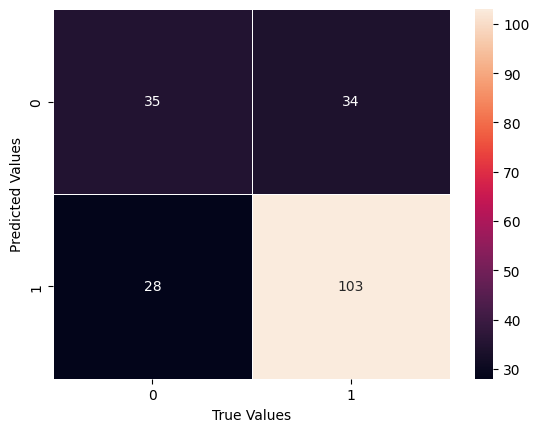

In [101]:
cm = confusion_matrix(pred_lr,y_test)
sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "white", fmt =".0f")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

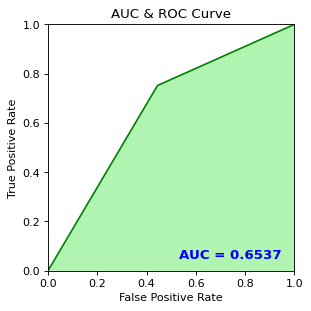

In [102]:
#plotting the ROC(Recieving operative characteristics) and AUC(area under the curve)
from sklearn.metrics import roc_auc_score,roc_curve
roc_auc = roc_auc_score(y_test, pred_lr)

false_positive_rate, true_positive_rate, thresolds =roc_curve(y_test, pred_lr)

plt.figure(figsize=(5, 4), dpi=80)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % roc_auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


## Decision Tree

In [103]:
model_dt.fit(X_smt,y_smt)

DecisionTreeClassifier()

In [104]:
model_dt.score(X_smt,y_smt)

1.0

In [105]:
param_dt = {
    'criterion':['gini','entropy'],
    'min_samples_split':[2,5,10,15], #min number of samples required to split an internal node, higher the min sample ,better it is, prevents overfitting
    'max_depth':[None,2],      #max number of obs 
    'min_samples_leaf':[1,3,10,15],  #min number of samples required to be at a leafe node, higher values prevent overfitting
    'max_features':[None,'sqrt','log2']  #none means all features will be used, sqrt means sqrt of total features will be used, log2 means log2 of the total number of features will be use
}

In [106]:
GSDT3 = GridSearchCV(model_dt, param_dt, cv=5, scoring='accuracy', n_jobs=n_thread)
GSDT3.fit(X_smt, y_smt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 10, 15],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [107]:
print('best_param:', GSDT3.best_params_)
print('best_score:', GSDT3.best_score_)

best_param: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
best_score: 0.7705039682539683


In [108]:
pred_dt3 = GSDT3.predict(X_test)
print(classification_report(pred_dt3,y_test))

              precision    recall  f1-score   support

           0       0.54      0.51      0.52        67
           1       0.76      0.78      0.77       133

    accuracy                           0.69       200
   macro avg       0.65      0.64      0.65       200
weighted avg       0.69      0.69      0.69       200



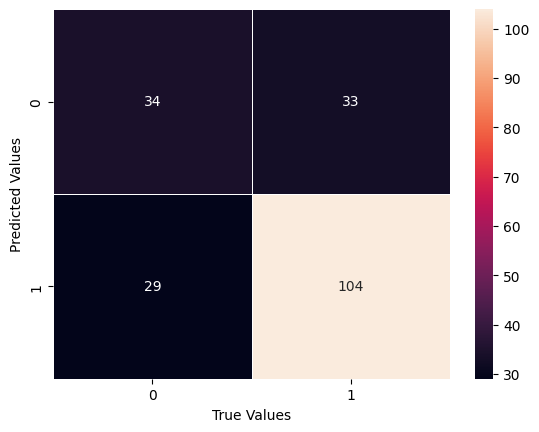

In [109]:
cm1 = confusion_matrix(pred_dt3,y_test)
sns.heatmap(cm1, annot = True, linewidth = 0.5, linecolor = "white", fmt =".0f")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [110]:
from sklearn import tree 

In [111]:
fig=plt.figure(figsize=(150,100))
tree.plot_tree(model_dt)

[Text(0.6890376194267516, 0.96875, 'x[9] <= 0.5\ngini = 0.5\nsamples = 1124\nvalue = [562, 562]'),
 Text(0.4562201433121019, 0.90625, 'x[10] <= 0.5\ngini = 0.453\nsamples = 800\nvalue = [523, 277]'),
 Text(0.22326831210191084, 0.84375, 'x[12] <= 0.5\ngini = 0.409\nsamples = 680\nvalue = [485, 195]'),
 Text(0.09426751592356689, 0.78125, 'x[11] <= 0.5\ngini = 0.25\nsamples = 307\nvalue = [262, 45]'),
 Text(0.06496815286624204, 0.71875, 'x[26] <= 0.5\ngini = 0.134\nsamples = 264\nvalue = [245, 19]'),
 Text(0.05222929936305733, 0.65625, 'x[40] <= 0.5\ngini = 0.11\nsamples = 258\nvalue = [243, 15]'),
 Text(0.04203821656050955, 0.59375, 'x[1] <= 421.0\ngini = 0.09\nsamples = 254\nvalue = [242, 12]'),
 Text(0.03694267515923567, 0.53125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.04713375796178344, 0.53125, 'x[22] <= 0.5\ngini = 0.076\nsamples = 252\nvalue = [242, 10]'),
 Text(0.033121019108280254, 0.46875, 'x[13] <= 0.5\ngini = 0.055\nsamples = 247\nvalue = [240, 7]'),
 Text(0.020382

## Random Forest

In [112]:
param_rf = {
    'n_estimators':[50,100,150,200,500,700,800,900],
    'criterion':['entropy','gini'],
    'min_samples_split':[2,5,],
    'max_depth':[None,2,4,5,6,7,8,9,10,12],
    'min_samples_leaf':[1,3,10],
    'max_features':['sqrt','auto','log2']
}

In [113]:
GSRF3 = GridSearchCV(model_rf, param_rf, cv=5, scoring='accuracy', n_jobs=n_thread)
GSRF3.fit(X_smt, y_smt)

c:\Users\Himu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
4800 fits failed out of a total of 14400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2564 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Himu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Himu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Himu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 2, 4, 5, 6, 7, 8, 9, 10, 12],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150, 200, 500, 700, 800,
                                          900]},
             scoring='accuracy')

In [114]:
print('best_param:', GSRF3.best_params_)
print('best_score:', GSRF3.best_score_)

best_param: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
best_score: 0.8230357142857143


In [115]:
pred_rf3 = GSRF3.predict(X_test)
print(classification_report(y_test, pred_rf3))

              precision    recall  f1-score   support

           0       0.69      0.49      0.57        63
           1       0.79      0.90      0.84       137

    accuracy                           0.77       200
   macro avg       0.74      0.69      0.71       200
weighted avg       0.76      0.77      0.76       200



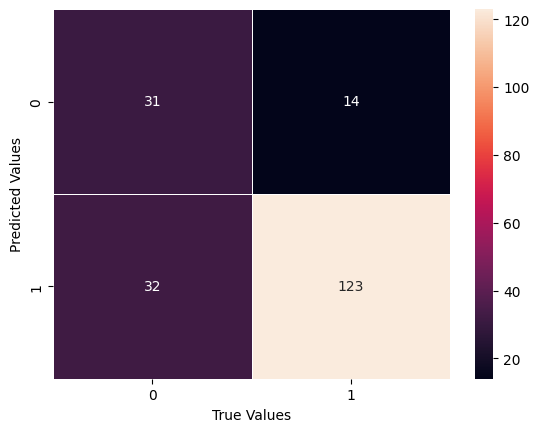

In [116]:
cm1 = confusion_matrix(pred_rf3,y_test)
sns.heatmap(cm1, annot = True, linewidth = 0.5, linecolor = "white", fmt =".0f")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

Here the best model is Decision Tree with the highest accuracy score.